(CONFIDENTIAL) INTERNAL USE ONLY, NOT FOR EXTERNAL DISTRIBUTION

<h1 id="tocheading">Table of Contents</h1>
<div id="toc"></div>

In [53]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>

# Classification

## Measurement

In [1]:
# accuracy_score, precision_score, recall_score, f1_score, 
# confusion_matrix, classification_report

In [1]:
from sklearn import metrics
import numpy as np

In [2]:
y_true = [0, 1, 0, 1, 1, 1, 0, 0] # raw data
y_pred = [0, 1, 1, 1, 1, 1, 0, 1] # final prediction
metrics.classification.confusion_matrix(y_true, y_pred)

array([[2, 2],
       [0, 4]])

In [3]:
metrics.classification.precision_score(y_true, y_pred, pos_label=0)

1.0

In [4]:
metrics.classification.precision_score(y_true, y_pred, pos_label=1)

0.6666666666666666

In [5]:
metrics.classification.recall_score(y_true, y_pred, pos_label=0)

0.5

In [6]:
metrics.classification.recall_score(y_true, y_pred, pos_label=1)

1.0

In [ ]:
#

In [ ]:
# confusion matrix

In [7]:
# ROC & AUC 
y_true = [0, 1, 0, 1, 1, 1, 0, 0] # raw data
y_score = [0.2, 0.7, 0.6, 0.6, 0.5, 0.9, 0.4, 0.6] # problistic results
# y_pred = [0, 1, 1, 1, 1, 1, 0, 1] # final prediction

In [8]:
x, y, thed = metrics.roc_curve(y_true, y_score, pos_label=1)

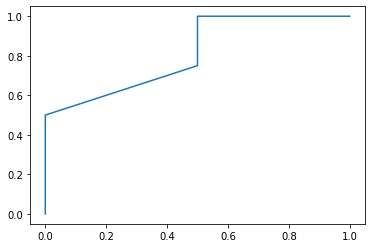

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(x, y)

In [10]:
metrics.auc(x, y)

0.8125

In [11]:
thed

array([1.9, 0.9, 0.7, 0.6, 0.5, 0.2])

In [12]:
y_true = [0, 1, 0, 1, 1, 1, 0, 0] # raw data
y_score = [0.2, 0.7, 0.6, 0.6, 0.5, 0.9, 0.4, 0.6] # problistic results
y_pred = [0, 0, 0, 0, 0, 1, 0, 0] # final prediction if threshold = 0.9

In [13]:
(np.array(y_score) >= 0.5).astype(int)

array([0, 1, 1, 1, 1, 1, 0, 1])

In [14]:
(1 - metrics.classification.recall_score(y_true, y_pred, pos_label=0), 
    metrics.classification.recall_score(y_true, y_pred, pos_label=1))

(0.0, 0.25)

In [15]:
y_true = [0, 1, 0, 1, 1, 1, 0, 0] # raw data
y_score = [0.2, 0.7, 0.6, 0.6, 0.5, 0.9, 0.4, 0.6] # problistic results
y_pred = [0, 1, 1, 1, 1, 1, 0, 1] # final prediction if threshold = 0.5

In [16]:
(1 - metrics.classification.recall_score(y_true, y_pred, pos_label=0), 
    metrics.classification.recall_score(y_true, y_pred, pos_label=1))

(0.5, 1.0)

In [ ]:
# AUC  0.9   0.8 which model is better? 

In [19]:
metrics.auc(x, y)

0.8125

## Basic algorithm

In [20]:
from sklearn import linear_model

In [21]:
linear_model.LogisticRegression?

In [22]:
from sklearn import datasets

In [23]:
X, Y = datasets.make_blobs(n_samples=100, n_features=2, centers=2, cluster_std=2, random_state=3)

In [24]:
Y

array([1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1])

In [25]:
import numpy as np
n = 50
m = 50
X0 = X[Y==0][:n]
X1 = X[Y==1][:m]
print(X0.shape, X1.shape)

Xnew = np.vstack([X0, X1])
Ynew = [0 if i < X0.shape[0] else 1 for i in range(m+n)]

(50, 2) (50, 2)


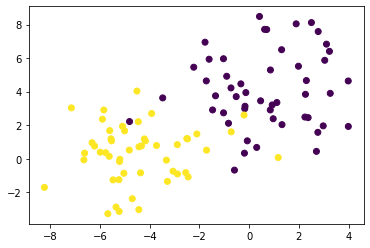

In [26]:
plt.scatter(Xnew[:,0], Xnew[:,1], c=Ynew)

In [29]:
lm_lr = linear_model.LogisticRegression()

In [30]:
lm_lr.fit(Xnew, Ynew)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [31]:
def plot_decision_boundary(lm_lr, Xnew, Ynew):
    h = .02  # step size in the mesh
    # create a mesh to plot in
    x_min, x_max = Xnew[:, 0].min() - 1, Xnew[:, 0].max() + 1
    y_min, y_max = Xnew[:, 1].min() - 1, Xnew[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    test_x = np.array([x1 for x1 in zip(xx.ravel(), yy.ravel())])
    test_y = lm_lr.predict_proba(test_x)

    plt.contourf(xx, yy, test_y[:,1].reshape(xx.shape), alpha=0.3)
    plt.scatter(Xnew[:,0], Xnew[:,1], c=Ynew)

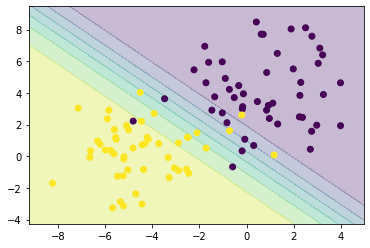

In [32]:
plot_decision_boundary(lm_lr, Xnew, Ynew)

In [33]:
lm_lr.coef_

array([[-0.94798145, -0.94305208]])

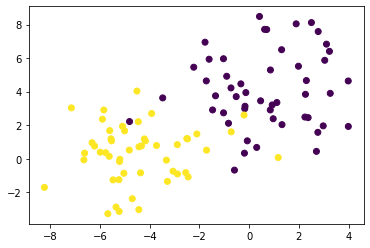

In [44]:
plt.scatter(X[:,0], X[:,1], c=Y)

In [45]:
a = X[Y==1]

In [34]:
from sklearn import tree

In [40]:
t_dtc = tree.DecisionTreeClassifier(random_state=1, max_depth=4)

In [41]:
t_dtc.fit(Xnew, Ynew)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1, splitter='best')

In [42]:
metrics.classification.confusion_matrix(Ynew, t_dtc.predict(Xnew))

array([[50,  0],
       [ 1, 49]])

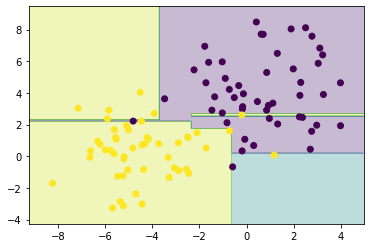

In [43]:
plot_decision_boundary(t_dtc, Xnew, Ynew)

In [ ]:
## Random Forest 

In [44]:
from sklearn import ensemble

In [45]:
#t_dtc = ensemble.BaggingClassifier(random_state=1, base_estimator=tree.DecisionTreeClassifier(max_depth=3), n_estimators=10)
t_dtc = ensemble.BaggingClassifier(random_state=1, n_estimators=100)

In [46]:
t_dtc.fit(Xnew, Ynew)

BaggingClassifier(base_estimator=None, bootstrap=True, bootstrap_features=False,
                  max_features=1.0, max_samples=1.0, n_estimators=100,
                  n_jobs=None, oob_score=False, random_state=1, verbose=0,
                  warm_start=False)

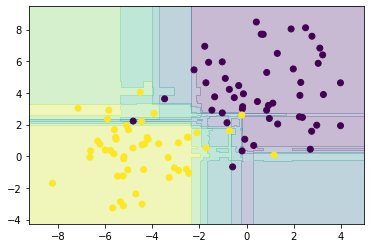

In [47]:
plot_decision_boundary(t_dtc, Xnew, Ynew)

In [48]:
t_dtc = ensemble.RandomForestClassifier(random_state=1, max_depth=2)

In [49]:
t_dtc.fit(Xnew, Ynew)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=2, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

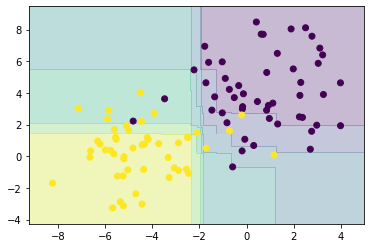

In [50]:
plot_decision_boundary(t_dtc, Xnew, Ynew)

In [ ]:
## GBT

In [51]:
t_dtc = ensemble.GradientBoostingClassifier(random_state=1, n_estimators=100)

In [52]:
t_dtc.fit(Xnew, Ynew)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=1, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

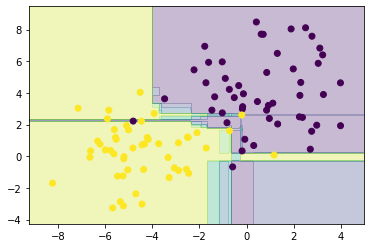

In [53]:
plot_decision_boundary(t_dtc, Xnew, Ynew)

In [ ]:
# Logistic regression

# decision tree
# http://www.r2d3.us/visual-intro-to-machine-learning-part-1/

# SVM
# https://www.youtube.com/watch?v=3liCbRZPrZA

## Decision boundary

In [ ]:
# how to plot a decision boudnary? 

lm_lr = linear_model.LinearRegression()
Ypred = lm_lr.predict(X)

In [ ]:
h = .02  # step size in the mesh
# create a mesh to plot in
x_min, x_max = Xnew[:, 0].min() - 1, Xnew[:, 0].max() + 1
y_min, y_max = Xnew[:, 1].min() - 1, Xnew[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
test_x = np.array([x1 for x1 in zip(xx.ravel(), yy.ravel())])
test_y = lm_lr.predict_proba(test_x)

plt.contourf(xx, yy, test_y[:,1].reshape(xx.shape), alpha=0.3)
plt.scatter(Xnew[:,0], Xnew[:,1], c=Ynew)

In [ ]:
plt.contourf?

## Probability calibration

In [ ]:
# What if we want probability to be right? not just prediction result

In [ ]:
centers = [(-5, -5), (0, 0), (5, 5)]
X, y = datasets.make_blobs(n_samples=100, n_features=2, cluster_std=1.0,
                  centers=2, shuffle=False, random_state=42)

In [ ]:
# 0.6 positvie -> 60% 
# logistic regression: 

In [ ]:
# decsion, SVM, NaiveBayes 
model.predict_proba _> 0.70 != 70% 

In [ ]:
dtc = tree.DecisionTreeClassifier(max_depth=5)

In [ ]:
dtc.fit(X, Y)

In [ ]:
from sklearn import calibration

In [ ]:
ir = calibration.IsotonicRegression?

In [ ]:
from sklearn import pipeline

In [ ]:
pipeline.Pipeline([('lgoistic regression', lm_lr), ('calibration', lr)])

In [ ]:
ir.fit(dtc.predict_proba(X)[:,1], Y)

In [ ]:
ir.predict(dtc.predict_proba(X)[:,1])

# Ensemble Models

## Averaging (bagging & random forest)

In [2]:
# build several estimators independently and then to average their predictions

In [3]:
# randomness in data

In [ ]:
# Decision tree model
# Sample Data 1 => M1
# Sample Data 2 => M2
# ...
# Sample Data 100 => M100
# boostrapping (sample with replacement) Aggregation

In [ ]:
# M1 ~ M2 ???

# randomness in features
# Sample Data 1 (6)
#    Look at ALL features (1,2,3,4,5,6), identify the best feature for first Split (1)
#    Look at ALL features (1,2,3,4,5,6), identify the best feature for second Split (2)

# Sample Data 2 (6)
#    Look at ALL features (1,2,3,4,5,6), identify the best feature for first Split (1)
#    Look at ALL features (1,2,3,4,5,6), identify the best feature for second Split (2)


# Sample Data 1
#    Look at RANDOMLY SELECTED features (4,5,6), identify the best feature for first Split (4)
#    Look at RANDOMLY SELECTED features (1,2,3), identify the best feature for second Split (1)

# Sample Data 2
#    Look at RANDOMLY SELECTED features (2,3,5), identify the best feature for first Split (2)
#    Look at RANDOMLY SELECTED features (1,3,6), identify the best feature for second Split (1)

In [4]:
# further randomness in model at each level split

In [5]:
# https://www.quora.com/How-does-randomization-in-a-random-forest-work?redirected_qid=212859

## Boosting (adaboost & gradient boosting)

In [ ]:
# adaptive change point weight

In [ ]:
# negative functional gradient